<a href="https://colab.research.google.com/github/EnFiore/machine-learning-fondamenti/blob/main/4%20-%20Overfitting%20e%20Tecniche%20di%20Regolarizzazione/regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tecniche di Regolarizzazione

In [1]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
RANDOM_SEED = 0

In [3]:
def evaluate_model(model, dataset):

  X, y = dataset

  y_pred = model.predict(X)

  print(f"MSE: {mean_squared_error(y, y_pred):.3f}")
  print(f"R2: {r2_score(y, y_pred):.3f}")

In [24]:
#creo dataset
X, y = make_regression(n_samples=100, n_features=100, n_informative=10, n_targets=1, random_state=RANDOM_SEED)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_SEED)

In [25]:
#standardizzo dati
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Ordinary Least Regression

modello di regressionelineare semplice



In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
evaluate_model(lr, (X_train, y_train))

MSE: 0.000
R2: 1.000


In [28]:
evaluate_model(lr, (X_test, y_test))

MSE: 10776.199
R2: 0.451


### Ridge Regression - L2

metodo di regolarizzaione

In [29]:
from sklearn.linear_model import Ridge

In [30]:
#si definisce il valore di lambda, come alpha
model = Ridge(alpha=1.)
model.fit(X_train, y_train)

Ridge()

In [31]:
evaluate_model(model, (X_train, y_train))

MSE: 4.561
R2: 1.000


In [32]:
evaluate_model(model, (X_test, y_test))

MSE: 11010.356
R2: 0.439


### Lasso Regression - L1

In [33]:
from sklearn.linear_model import Lasso

In [34]:
model = Lasso(alpha=1.)
model.fit(X_train, y_train)

Lasso()

In [35]:
evaluate_model(model, (X_train, y_train))

MSE: 13.389
R2: 0.999


In [36]:
evaluate_model(model, (X_test, y_test))

MSE: 27.931
R2: 0.999


##ElasticNet (L1+L2)

metodo di regolrizzaione che usa sia L1 sia L2, dando un peso a ciascuna

In [37]:
from sklearn.linear_model import ElasticNet

In [41]:
#l1_ratio è l'argomento che da un peso alla regolarizzione, 1 indica che si usa la 100% L1
model = ElasticNet(alpha=1., l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet()

In [42]:
evaluate_model(model, (X_train, y_train))

MSE: 1353.886
R2: 0.915


In [43]:
evaluate_model(model, (X_test, y_test))

MSE: 13652.929
R2: 0.304


### Learning curve

curva di apprendimento

In [46]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

train_sizes_abs, train_scores, test_scores = learning_curve(
    Lasso(),
    X,
    y,
    random_state=RANDOM_SEED
)

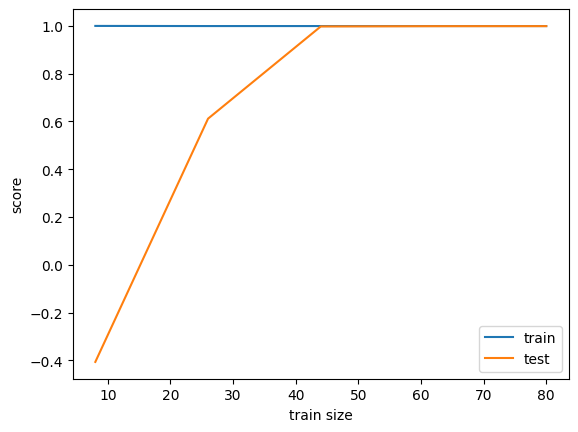

In [49]:
#asse x numero di esempi, asse y i punteggi medi
plt.plot(train_sizes_abs, train_scores.mean(axis=1))
plt.plot(train_sizes_abs, test_scores.mean(axis=1))
plt.legend(["train", "test"])
plt.xlabel("train size")
plt.ylabel("score")
plt.show()
#con pochi dati si ha overfitting poi il modello si regolarizza e darà risultati migliori